In [1]:
import numpy as np
from tqdm import tqdm 
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import os

In [2]:
save_plot = True

currentNotebook = 'photonuclear'

plot_dir = 'plots/{}/'.format(currentNotebook)
os.system('mkdir -p {}'.format(plot_dir))

df_dir = 'data/{}/'.format(currentNotebook)
os.system('mkdir -p {}'.format(df_dir))

0

In [3]:
colors = cm.Set1(np.linspace(0, 1, 9))

In [4]:
rnd_state = np.random.RandomState(33)

In [5]:
def get_new_psi_nuclint(E, E_, rnd_state, is_degree=True, nu_min=None, nu_max=True):
    M = 0.9383 # Proton mass
    mu = 0.1057 # Muon mass
    if nu_min is not None:
        if E - E_ < nu_min:
            print('minimum energy transfer is 0.2 GeV')
            return 0
    if nu_max:
        nu_max = E - M / 2
        if E - E_ > nu_max:
            print('maximum energy transfer is (E - mass_nucleon/2)={}, but here: ', E - E_)
            return 0
    m_0=np.sqrt(0.4)
    p = rnd_state.uniform(0, 1)
    # nu = epsilon
    epsilon = E - E_
    y = epsilon / E
    t_max = 2 * M * epsilon
    t_min = (mu * y)**2 / (1 - y)
    t_1 = np.minimum(epsilon**2, m_0**2)
    t_p = (t_max * t_1) / ((t_max + t_1) * ((t_max * (t_min + t_1))\
                    / (t_min * (t_max + t_1)))**p - t_max)
    sin2 = (t_p - t_min) / (4 * (E * E_ - mu**2) - 2 * t_min)
    theta_mu = 2 * np.arcsin(np.sqrt(sin2))
    
    if is_degree:
        return np.rad2deg(theta_mu)
    else:
        return theta_mu
    
def get_rms_theta_nuclint_ginneken(E, E_, m=0.1057):
    nu = (E - E_) / (E - m)
    rms_theta = (0.39 / (E * (1 - nu))) * (np.sqrt(E) * nu * (1 - nu))**0.17 * (1 - 0.135/(E * nu))
    return rms_theta    

  0%|          | 0/25 [00:00<?, ?it/s]

1e-07 9.989429997858679e-06
1.956403059575575e-07 1.954335141363117e-05
3.8275129315166785e-07 3.823467250185786e-05
7.488158009784308e-07 7.480243026236622e-05
1.46498552409274e-06 0.00014634370343458158
2.8661021615689635e-06 0.00028630726916389904
5.607251037949689e-06 0.0005601324173625244
1.0970043086453112e-05 0.001095844775093724
2.1461825858012795e-05 0.002143914070813935
4.198798177269442e-05 0.004194360047591772
8.214541600550284e-05 0.00820585883008107
0.0001607095432032745 0.016053967321610685
0.00031441264202587926 0.03140803078632359
0.0006151178548286708 0.0614467675256094
0.0012034184531863772 0.12021464398813464


  0%|          | 0/25 [00:00<?, ?it/s]

1e-07 9.998943005484762e-05
1.956403059575575e-07 0.00019561962676561961
3.8275129315166785e-07 0.00038271083633389935
7.488158009784308e-07 0.0007487366511895743
1.46498552409274e-06 0.0014648306751041673
2.8661021615689635e-06 0.0028657992145326716
5.607251037949689e-06 0.005606658351553051
1.0970043086453112e-05 0.010968883552891384
2.1461825858012795e-05 0.02145955734306426
4.198798177269442e-05 0.04198354364302759
8.214541600550284e-05 0.08213673323507464
0.0001607095432032745 0.16069255620459444


  0%|          | 0/25 [00:00<?, ?it/s]

1e-07 0.009999989430070855
1.956403059575575e-07 0.01956400991184637
3.8275129315166785e-07 0.03827508885296993
7.488158009784308e-07 0.07488150094286539
1.46498552409274e-06 0.1464983975602081


100%|██████████| 25/25 [00:08<00:00,  3.10it/s]


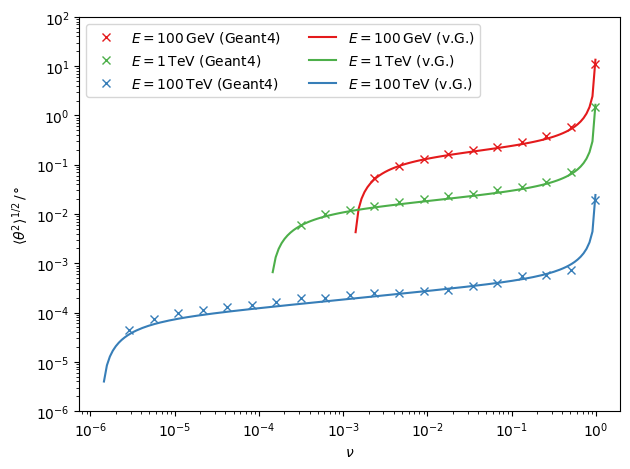

In [8]:
n_events = int(1e5) 

nu_min_Geant4 = 0.201

nu = np.logspace(-7, -5e-3, 25)
m = 0.1057

E = 1e2 # 100 GeV
E_prime = E - nu * (E - m)
rms_thetas = []
rms_thetas_err = []
for e in tqdm(nu):
    rms = np.array([])
    E_ = E - e * (E - m)
    if E - E_ < nu_min_Geant4:
        print(e, E - E_)
        continue
    angles = [get_new_psi_nuclint(E, E_, rnd_state, is_degree=True) for i in range(n_events)]
    rms = np.append(rms, angles)
    rms_thetas.append(np.sqrt(np.mean(rms**2)))  
    rms_thetas_err.append(np.std(angles))
plt.plot(nu[(E - E_prime) >= nu_min_Geant4], rms_thetas, 'x', color=colors[0], label=r'$E = 100\,$GeV (Geant4)')
# plt.errorbar(nu[(E - E_prime) > nu_min_Geant4], rms_thetas, yerr=rms_thetas_err, color='gray', alpha=0.5, fmt='x', label=r'$E = 100\,$GeV (Geant4)')


E = 1e3 # 1 TeV
E_prime = E - nu * (E - m)
rms_thetas = []
rms_thetas_err = []
for e in tqdm(nu):
    rms = np.array([])
    E_ = E - e * (E - m)
    if E - E_ < nu_min_Geant4:
        print(e, E - E_)
        continue
    angles = [get_new_psi_nuclint(E, E_, rnd_state, is_degree=True) for i in range(n_events)]
    rms = np.append(rms, angles)
    rms_thetas.append(np.sqrt(np.mean(rms**2)))
    rms_thetas_err.append(np.std(angles))
plt.plot(nu[(E - E_prime) >= nu_min_Geant4], rms_thetas, 'x', color=colors[2], label=r'$E = 1\,$TeV (Geant4)')
# plt.errorbar(nu[(E - E_prime) > nu_min_Geant4], rms_thetas, yerr=rms_thetas_err, color='slategrey', fmt='x', label=r'$E = 1\,$TeV (Geant4)')



E = 1e5 # 100 TeV
E_prime = E - nu * (E - m)
rms_thetas = []
rms_thetas_err = []
for e in tqdm(nu):
    rms = np.array([])
    E_ = E - e * (E - m)
    if E - E_ < nu_min_Geant4:
        print(e, E - E_)
        continue
    angles = [get_new_psi_nuclint(E, E_, rnd_state, is_degree=True) for i in range(n_events)]
    rms = np.append(rms, angles)
    rms_thetas.append(np.sqrt(np.mean(rms**2))) 
    rms_thetas_err.append(np.std(angles))
plt.plot(nu[(E - E_prime) >= nu_min_Geant4], rms_thetas, 'x', color=colors[1], label=r'$E = 100\,$TeV (Geant4)')
# plt.errorbar(nu[(E - E_prime) > nu_min_Geant4], rms_thetas, yerr=rms_thetas_err, color='black', fmt='x', label=r'$E = 100\,$TeV (Geant4)')

nu = np.logspace(-7, -5e-3, 200)

E = 1e2 # GeV
E_ = E - nu * (E - m)
values = np.rad2deg(get_rms_theta_nuclint_ginneken(E, E_))
plt.plot(nu[values>0], values[values>0], '-', color=colors[0], alpha=1, label=r'$E = 100\,$GeV (v.G.)')

E = 1e3 # GeV
E_ = E - nu * (E - m)
values = np.rad2deg(get_rms_theta_nuclint_ginneken(E, E_))
plt.plot(nu[values>0], values[values>0], '-', color=colors[2], alpha=1, label=r'$E = 1\,$TeV (v.G.)')

E = 1e5 # GeV
E_ = E - nu * (E - m)
values = np.rad2deg(get_rms_theta_nuclint_ginneken(E, E_))
plt.plot(nu[values>0], values[values>0], '-', color=colors[1], alpha=1, label=r'$E = 100\,$TeV (v.G.)')


plt.yscale('log')
plt.xscale('log')
# plt.xlabel(r'$\epsilon$ (Geant4) and $\nu$ (v.G.)')
plt.xlabel(r'$\nu$')
plt.ylabel(r'$\langle\theta^2\rangle^{1/2}\,/\,°$')
plt.ylim(1e-6, 100)
plt.legend(loc='upper left', ncol=2)
plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + 'photonuclear_rms_theta_100GeV_1TeV_100TeV.pdf')

  0%|          | 0/25 [00:00<?, ?it/s]

1e-07 9.989429997858679e-06
1.956403059575575e-07 1.954335141363117e-05
3.8275129315166785e-07 3.823467250185786e-05
7.488158009784308e-07 7.480243026236622e-05


  0%|          | 0/25 [00:00<?, ?it/s]

1e-07 9.998943005484762e-05


100%|██████████| 25/25 [00:10<00:00,  2.46it/s]


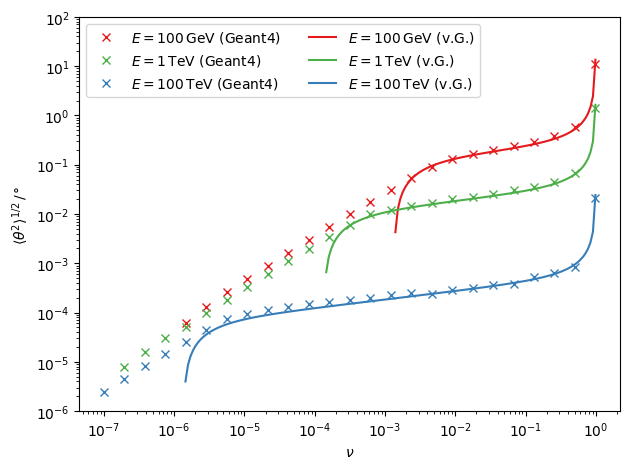

In [10]:
n_events = int(1e5) 

nu_min_Geant4 = 0.0001

nu = np.logspace(-7, -5e-3, 25)
m = 0.1057

E = 1e2 # 100 GeV
E_prime = E - nu * (E - m)
rms_thetas = []
rms_thetas_err = []
for e in tqdm(nu):
    rms = np.array([])
    E_ = E - e * (E - m)
    if E - E_ < nu_min_Geant4:
        print(e, E - E_)
        continue
    angles = [get_new_psi_nuclint(E, E_, rnd_state, is_degree=True) for i in range(n_events)]
    rms = np.append(rms, angles)
    rms_thetas.append(np.sqrt(np.mean(rms**2)))  
    rms_thetas_err.append(np.std(angles))
plt.plot(nu[(E - E_prime) >= nu_min_Geant4], rms_thetas, 'x', color=colors[0], label=r'$E = 100\,$GeV (Geant4)')
# plt.errorbar(nu[(E - E_prime) > nu_min_Geant4], rms_thetas, yerr=rms_thetas_err, color='gray', alpha=0.5, fmt='x', label=r'$E = 100\,$GeV (Geant4)')


E = 1e3 # 1 TeV
E_prime = E - nu * (E - m)
rms_thetas = []
rms_thetas_err = []
for e in tqdm(nu):
    rms = np.array([])
    E_ = E - e * (E - m)
    if E - E_ < nu_min_Geant4:
        print(e, E - E_)
        continue
    angles = [get_new_psi_nuclint(E, E_, rnd_state, is_degree=True) for i in range(n_events)]
    rms = np.append(rms, angles)
    rms_thetas.append(np.sqrt(np.mean(rms**2)))
    rms_thetas_err.append(np.std(angles))
plt.plot(nu[(E - E_prime) >= nu_min_Geant4], rms_thetas, 'x', color=colors[2], label=r'$E = 1\,$TeV (Geant4)')
# plt.errorbar(nu[(E - E_prime) > nu_min_Geant4], rms_thetas, yerr=rms_thetas_err, color='slategrey', fmt='x', label=r'$E = 1\,$TeV (Geant4)')



E = 1e5 # 100 TeV
E_prime = E - nu * (E - m)
rms_thetas = []
rms_thetas_err = []
for e in tqdm(nu):
    rms = np.array([])
    E_ = E - e * (E - m)
    if E - E_ < nu_min_Geant4:
        print(e, E - E_)
        continue
    angles = [get_new_psi_nuclint(E, E_, rnd_state, is_degree=True) for i in range(n_events)]
    rms = np.append(rms, angles)
    rms_thetas.append(np.sqrt(np.mean(rms**2))) 
    rms_thetas_err.append(np.std(angles))
plt.plot(nu[(E - E_prime) >= nu_min_Geant4], rms_thetas, 'x', color=colors[1], label=r'$E = 100\,$TeV (Geant4)')
# plt.errorbar(nu[(E - E_prime) > nu_min_Geant4], rms_thetas, yerr=rms_thetas_err, color='black', fmt='x', label=r'$E = 100\,$TeV (Geant4)')

nu = np.logspace(-7, -5e-3, 200)

E = 1e2 # GeV
E_ = E - nu * (E - m)
values = np.rad2deg(get_rms_theta_nuclint_ginneken(E, E_))
plt.plot(nu[values>0], values[values>0], '-', color=colors[0], alpha=1, label=r'$E = 100\,$GeV (v.G.)')

E = 1e3 # GeV
E_ = E - nu * (E - m)
values = np.rad2deg(get_rms_theta_nuclint_ginneken(E, E_))
plt.plot(nu[values>0], values[values>0], '-', color=colors[2], alpha=1, label=r'$E = 1\,$TeV (v.G.)')

E = 1e5 # GeV
E_ = E - nu * (E - m)
values = np.rad2deg(get_rms_theta_nuclint_ginneken(E, E_))
plt.plot(nu[values>0], values[values>0], '-', color=colors[1], alpha=1, label=r'$E = 100\,$TeV (v.G.)')


plt.yscale('log')
plt.xscale('log')
# plt.xlabel(r'$\epsilon$ (Geant4) and $\nu$ (v.G.)')
plt.xlabel(r'$\nu$')
plt.ylabel(r'$\langle\theta^2\rangle^{1/2}\,/\,°$')
plt.ylim(1e-6, 100)
plt.legend(loc='upper left', ncol=2)
plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + 'photonuclear_rms_theta_100GeV_1TeV_100TeV_no_nu_min.pdf')

# Plots for PROPOSAL paper

  0%|          | 0/25 [00:00<?, ?it/s]

1e-07 9.989429997858679e-06
1.956403059575575e-07 1.954335141363117e-05
3.8275129315166785e-07 3.823467250185786e-05
7.488158009784308e-07 7.480243026236622e-05
1.46498552409274e-06 0.00014634370343458158
2.8661021615689635e-06 0.00028630726916389904
5.607251037949689e-06 0.0005601324173625244
1.0970043086453112e-05 0.001095844775093724
2.1461825858012795e-05 0.002143914070813935
4.198798177269442e-05 0.004194360047591772
8.214541600550284e-05 0.00820585883008107
0.0001607095432032745 0.016053967321610685
0.00031441264202587926 0.03140803078632359
0.0006151178548286708 0.0614467675256094
0.0012034184531863772 0.12021464398813464


  0%|          | 0/25 [00:00<?, ?it/s]

1e-07 9.998943005484762e-05
1.956403059575575e-07 0.00019561962676561961
3.8275129315166785e-07 0.00038271083633389935
7.488158009784308e-07 0.0007487366511895743
1.46498552409274e-06 0.0014648306751041673
2.8661021615689635e-06 0.0028657992145326716
5.607251037949689e-06 0.005606658351553051
1.0970043086453112e-05 0.010968883552891384
2.1461825858012795e-05 0.02145955734306426
4.198798177269442e-05 0.04198354364302759
8.214541600550284e-05 0.08213673323507464
0.0001607095432032745 0.16069255620459444


  0%|          | 0/25 [00:00<?, ?it/s]

1e-07 0.009999989430070855
1.956403059575575e-07 0.01956400991184637
3.8275129315166785e-07 0.03827508885296993
7.488158009784308e-07 0.07488150094286539
1.46498552409274e-06 0.1464983975602081


100%|██████████| 25/25 [00:08<00:00,  3.09it/s]


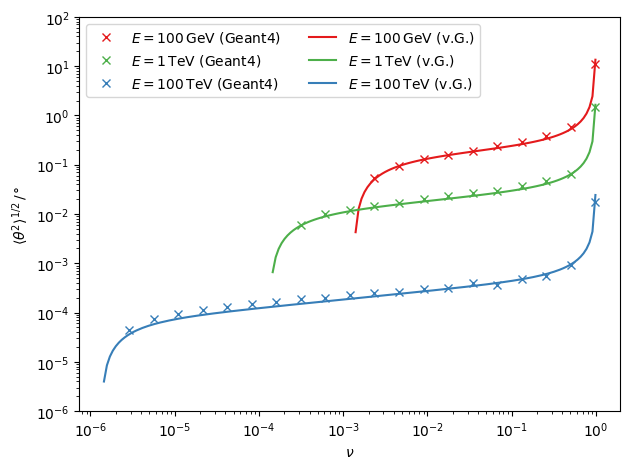

In [11]:
n_events = int(1e5) 

nu_min_Geant4 = 0.201

nu = np.logspace(-7, -5e-3, 25)
m = 0.1057

E = 1e2 # 100 GeV
E_prime = E - nu * (E - m)
rms_thetas = []
rms_thetas_err = []
for e in tqdm(nu):
    rms = np.array([])
    E_ = E - e * (E - m)
    if E - E_ < nu_min_Geant4:
        print(e, E - E_)
        continue
    angles = [get_new_psi_nuclint(E, E_, rnd_state, is_degree=True) for i in range(n_events)]
    rms = np.append(rms, angles)
    rms_thetas.append(np.sqrt(np.mean(rms**2)))  
    rms_thetas_err.append(np.std(angles))
plt.plot(nu[(E - E_prime) >= nu_min_Geant4], rms_thetas, 'x', color=colors[0], label=r'$E = 100\,$GeV (Geant4)')
# plt.errorbar(nu[(E - E_prime) > nu_min_Geant4], rms_thetas, yerr=rms_thetas_err, color='gray', alpha=0.5, fmt='x', label=r'$E = 100\,$GeV (Geant4)')


E = 1e3 # 1 TeV
E_prime = E - nu * (E - m)
rms_thetas = []
rms_thetas_err = []
for e in tqdm(nu):
    rms = np.array([])
    E_ = E - e * (E - m)
    if E - E_ < nu_min_Geant4:
        print(e, E - E_)
        continue
    angles = [get_new_psi_nuclint(E, E_, rnd_state, is_degree=True) for i in range(n_events)]
    rms = np.append(rms, angles)
    rms_thetas.append(np.sqrt(np.mean(rms**2)))
    rms_thetas_err.append(np.std(angles))
plt.plot(nu[(E - E_prime) >= nu_min_Geant4], rms_thetas, 'x', color=colors[2], label=r'$E = 1\,$TeV (Geant4)')
# plt.errorbar(nu[(E - E_prime) > nu_min_Geant4], rms_thetas, yerr=rms_thetas_err, color='slategrey', fmt='x', label=r'$E = 1\,$TeV (Geant4)')



E = 1e5 # 100 TeV
E_prime = E - nu * (E - m)
rms_thetas = []
rms_thetas_err = []
for e in tqdm(nu):
    rms = np.array([])
    E_ = E - e * (E - m)
    if E - E_ < nu_min_Geant4:
        print(e, E - E_)
        continue
    angles = [get_new_psi_nuclint(E, E_, rnd_state, is_degree=True) for i in range(n_events)]
    rms = np.append(rms, angles)
    rms_thetas.append(np.sqrt(np.mean(rms**2))) 
    rms_thetas_err.append(np.std(angles))
plt.plot(nu[(E - E_prime) >= nu_min_Geant4], rms_thetas, 'x', color=colors[1], label=r'$E = 100\,$TeV (Geant4)')
# plt.errorbar(nu[(E - E_prime) > nu_min_Geant4], rms_thetas, yerr=rms_thetas_err, color='black', fmt='x', label=r'$E = 100\,$TeV (Geant4)')

nu = np.logspace(-7, -5e-3, 200)

E = 1e2 # GeV
E_ = E - nu * (E - m)
values = np.rad2deg(get_rms_theta_nuclint_ginneken(E, E_))
plt.plot(nu[values>0], values[values>0], '-', color=colors[0], alpha=1, label=r'$E = 100\,$GeV (v.G.)')

E = 1e3 # GeV
E_ = E - nu * (E - m)
values = np.rad2deg(get_rms_theta_nuclint_ginneken(E, E_))
plt.plot(nu[values>0], values[values>0], '-', color=colors[2], alpha=1, label=r'$E = 1\,$TeV (v.G.)')

E = 1e5 # GeV
E_ = E - nu * (E - m)
values = np.rad2deg(get_rms_theta_nuclint_ginneken(E, E_))
plt.plot(nu[values>0], values[values>0], '-', color=colors[1], alpha=1, label=r'$E = 100\,$TeV (v.G.)')


plt.yscale('log')
plt.xscale('log')
# plt.xlabel(r'$\epsilon$ (Geant4) and $\nu$ (v.G.)')
plt.xlabel(r'$\nu$')
plt.ylabel(r'$\langle\theta^2\rangle^{1/2}\,/\,°$')
plt.ylim(1e-6, 100)
plt.legend(loc='upper left', ncol=2)
plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + 'paper_photonuclear_rms_theta_100GeV_1TeV_100TeV.pdf')